In [1]:
import pandas as pd
import numpy as np

In [3]:
car_data=pd.read_csv('car data.csv')

In [5]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
car_data.shape

(301, 9)

In [ ]:
# checking null values

In [7]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# Dropping duplicate values

In [10]:
car_data.duplicated().sum()

2

In [12]:
car_data.drop_duplicates(inplace=True)

In [13]:
car_data.shape

(299, 9)

In [15]:
car_data.reset_index(drop=True,inplace=True)

In [ ]:
# lets find unique values

In [16]:
print(car_data['Fuel_Type'].value_counts())

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64


In [20]:
print(car_data['Seller_Type'].value_counts())

Seller_Type
Dealer        193
Individual    106
Name: count, dtype: int64


In [23]:
print(car_data['Transmission'].value_counts())

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64


In [34]:
# Encoding Fuel Type column
Fuel_Type_Mapping={'Petrol':0,'Diesel':1,'CNG':2}
car_data['Fuel_Type']=car_data['Fuel_Type'].replace(Fuel_Type_Mapping)



In [35]:
# Encoding Fuel Type column
Seller_Type_Mapping={'Dealer':0,'Individual':1}
car_data['Seller_Type']=car_data['Seller_Type'].replace(Seller_Type_Mapping)

In [38]:
# Encoding Fuel Type column
Transmission_Mapping={'Manual':0,'Automatic':39}
car_data['Transmission']=car_data['Transmission'].replace(Transmission_Mapping)

In [39]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [41]:
car_data['Fuel_Type'].value_counts()

Fuel_Type
0    239
1     58
2      2
Name: count, dtype: int64

In [42]:
car_data['Seller_Type'].value_counts()

Seller_Type
0    193
1    106
Name: count, dtype: int64

In [43]:
car_data['Transmission'].value_counts()

Transmission
0     260
39     39
Name: count, dtype: int64

In [45]:
Y=car_data['Selling_Price']
X=car_data.drop(['Car_Name','Selling_Price'],axis=1)

In [ ]:
# Splitting the data in to the train and test data

In [46]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [49]:
from sklearn.linear_model import LinearRegression

In [51]:
linear_regressor=LinearRegression()

In [52]:
linear_regressor.fit(X_train,Y_train)

LinearRegression()

In [66]:
Y_train_predicted=linear_regressor.predict(X_train)

In [53]:
Y_Predicted=linear_regressor.predict(X_test)

In [54]:
from sklearn.metrics import r2_score

In [72]:
trained_data_error=r2_score(Y_train,Y_train_predicted)
print(f'error in predicting trained data {trained_data_error}')


error in predicting trained data 0.8771123681040539
0.8771123681040539


In [74]:
import matplotlib.pyplot  as plt

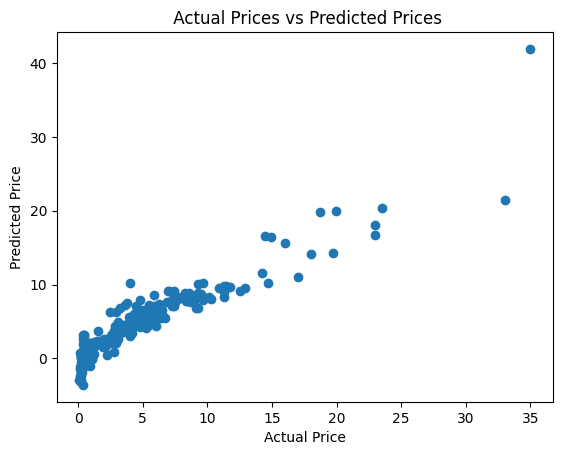

In [76]:
plt.scatter(Y_train, Y_train_predicted)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()



In [73]:
tested_data_error=r2_score(Y_test,Y_Predicted)
print(f'error in predicting test data {tested_data_error}')


error in predicting test data 0.8562516649197959


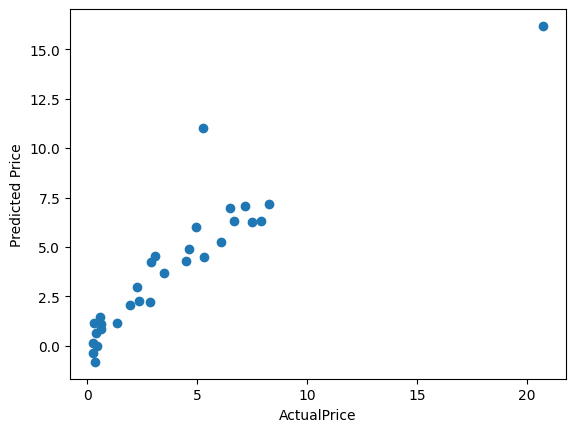

In [65]:
plt.scatter(Y_test,Y_Predicted)
plt.xlabel('ActualPrice')
plt.ylabel('Predicted Price')
plt.show()